### **Importing Libraries**

In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


%matplotlib inline

### **Importing image dataset**

In [2]:
def create_dataset(img_folder): 
    img_data_array=[]  ## list to store images
    class_name=[]  ## list to store class of the images
    for dir in os.listdir(img_folder):
        for img in os.listdir(os.path.join(img_folder,dir)): 
            try:
                imagepath=os.path.join(img_folder,dir,img)
                if(imagepath.split(".")[-1]=="gif"):
                    continue
                image=cv2.imread(imagepath,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,(200,200),interpolation=cv2.INTER_AREA).flatten()
                image=np.array(image.astype("float32"))
                img_data_array.append(image)
                class_name.append(dir)
            except Exception as e:
                continue   
    return np.array(img_data_array),class_name      

**Importing the dataset from the directory based on collab**

In [21]:
img_data,class_name=create_dataset(r"asl-dataset/asl_dataset")

### **Dictionary to Convert Target Class to Integer**

In [22]:
targetClasses={key:value for value,key in enumerate(np.unique(class_name))}
getClasses={value:key for value,key in enumerate(np.unique(class_name))}

In [52]:
targetClasses

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

**Encoding the Target Class**

In [23]:
targetClss=[targetClasses[class_name[i]] for i in range(len(class_name))]

### **Size of the dataset**

In [24]:
print(f"The size of the dataset: {len(img_data)}")
print(f"The Shape of the Dataset: {img_data.shape}")

The size of the dataset: 2515
The Shape of the Dataset: (2515, 120000)


### **Shuffling and Spliting the Data**

In [25]:
## shuffling to create randomness in the data
temp=list(zip(img_data,targetClss))
np.random.shuffle(temp)
img_data,targetClss=zip(*temp)
## spliting into training and testing
x_train=img_data[:2012]
x_test=img_data[2012:]
y_train=targetClss[:2012]
y_test=targetClss[2012:]

### **Size of train and test data**

In [26]:

print(f"Total Number of Train Data: {len(x_train)}")
print(f"Total Number of Test Data: {len(x_test)}")


Total Number of Train Data: 2012
Total Number of Test Data: 503


### **Visualization of data**

**Total Test Cases in each Class**

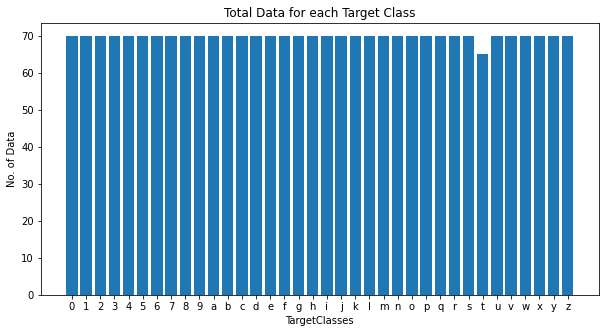

In [27]:
targetClssCounts={}
for tar in targetClasses:
    targetClssCounts[tar]=class_name.count(tar)
  
# print(targetClssCounts)
# print(list(range(len(targetClssCounts))))
# print(list(targetClssCounts.values()))
# print(list(targetClssCounts.keys()))
plt.figure(figsize=(10,5))
plt.bar(list(range(len(targetClssCounts))),list(targetClssCounts.values()),
        tick_label=list(targetClssCounts.keys()),width=0.8)
plt.xlabel("TargetClasses")
plt.ylabel("No. of Data")
plt.title("Total Data for each Target Class")
plt.show()

**Data Distribution in Test Test**

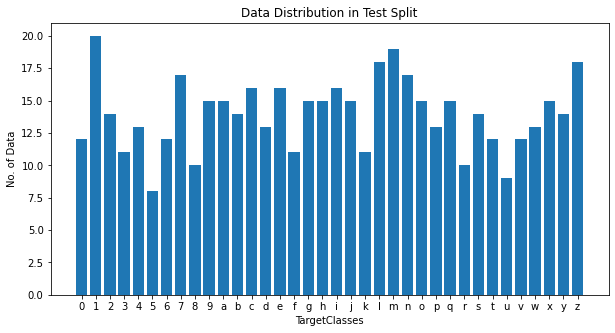

In [28]:
targettestClssCounts={}
for tar in targetClasses:
    targettestClssCounts[tar]=y_test.count(targetClasses[tar])


plt.figure(figsize=(10,5))
plt.bar(list(range(len(targettestClssCounts))),list(targettestClssCounts.values()),
        tick_label=list(targettestClssCounts.keys()),width=0.8)
plt.xlabel("TargetClasses")
plt.ylabel("No. of Data")
plt.title("Data Distribution in Test Split")
plt.show()

**Data Distribution in Train Split**

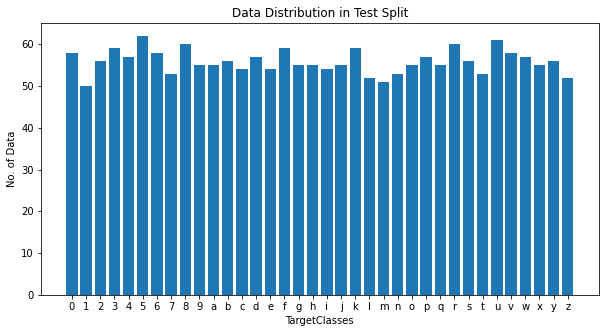

In [29]:
targettrainClssCounts={}
for tar in targetClasses:
    targettrainClssCounts[tar]=y_train.count(targetClasses[tar])

plt.figure(figsize=(10,5))
plt.bar(list(range(len(targettrainClssCounts))),list(targettrainClssCounts.values()),
        tick_label=list(targettrainClssCounts.keys()),width=0.8)
plt.xlabel("TargetClasses")
plt.ylabel("No. of Data")
plt.title("Data Distribution in Test Split")
plt.show()    

## **Trainig on Different Models and Evaluation**

### **Model 1: K Neighbor Classifier**

**Initializing The model with 6 neighbors**

In [30]:

knnClss=KNeighborsClassifier(n_neighbors=6)
knnClss.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

**Predicting for the test data:**

In [31]:
predicted=[]
for line in x_test:
  
  predicted.append(knnClss.predict([line]))

**Accuracy of the model and F1 accuracy for each Class**

In [32]:
print(f"Accuracy of the model: {accuracy_score(predicted,y_test)}")
print(f"F1 Score of the model:\n{f1_score(y_test,predicted,average=None)}")


Accuracy of the model: 0.9165009940357853
F1 Score of the model:
[0.66666667 0.97560976 0.86666667 1.         0.72       0.84210526
 0.81818182 0.8125     1.         0.96551724 0.96774194 1.
 0.9375     0.86956522 1.         1.         0.9375     0.96551724
 1.         1.         0.95652174 0.97297297 0.88372093 0.8
 0.66666667 0.96       1.         0.86956522 0.96296296 0.86956522
 0.875      0.85714286 0.89655172 1.         0.96296296 0.97297297]


**Confusion Matrix**

Text(0.5, 1.0, 'Accuracy Score: 0.9165009940357853')

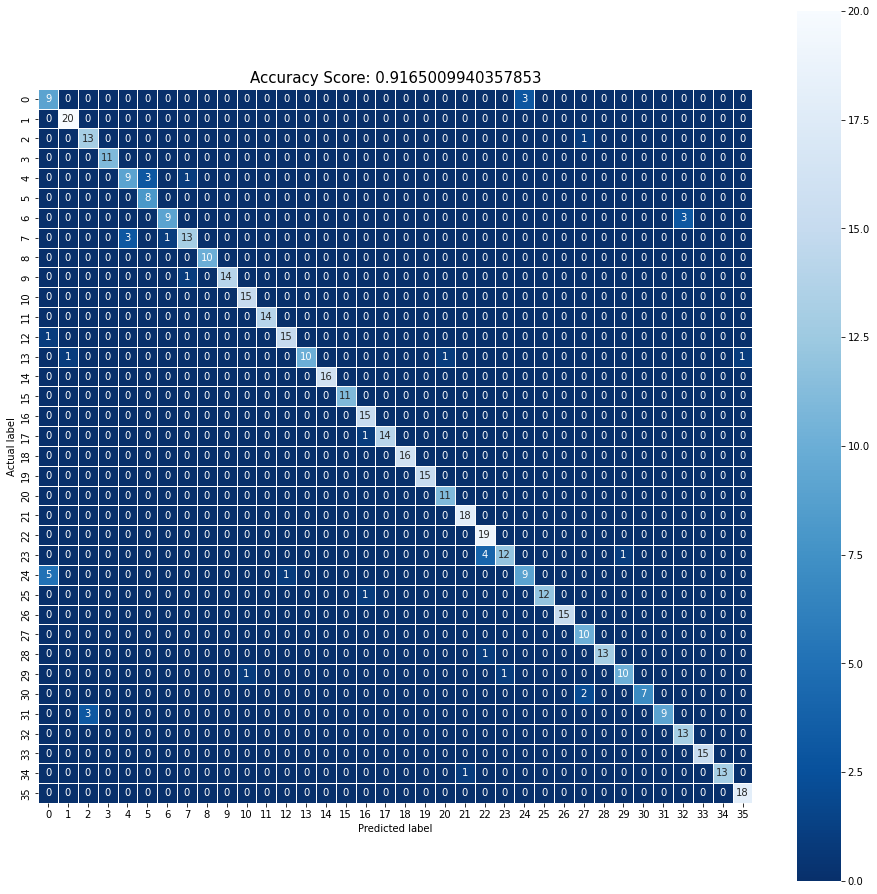

In [33]:
cm = confusion_matrix(y_test,predicted)
plt.figure(figsize=(16,16))
sns.heatmap(cm,annot=True, fmt='.0f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predicted))
plt.title(all_sample_title,size=15)

**Predicting for Random Data**

In [34]:
temp=list(zip(img_data,targetClss))
np.random.shuffle(temp)
img_data,targetClss=zip(*temp)

for i in range(10):
  result=knnClss.predict([img_data[i]])
  print(f"Actucal Class : {getClasses[targetClss[i]]} Predicted Class: {getClasses[result[0]]}")
    

Actucal Class : v Predicted Class: v
Actucal Class : l Predicted Class: l
Actucal Class : j Predicted Class: j
Actucal Class : i Predicted Class: i
Actucal Class : e Predicted Class: e
Actucal Class : j Predicted Class: j
Actucal Class : r Predicted Class: r
Actucal Class : 1 Predicted Class: 1
Actucal Class : o Predicted Class: o
Actucal Class : 9 Predicted Class: 9


### **Model 2: Multinomial Logistic Regression Model**

**Initialzing the model**

In [35]:
LogReg = LogisticRegression(multi_class="multinomial",solver='lbfgs', max_iter=2000)

**Training the Model**

In [37]:
LogReg.fit(x_train,y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

**Predicting for the test cases**

In [38]:
y_pred = LogReg.predict(x_test)

**Accuracy of the model and F1 accuracy for each Class**

In [39]:
print(f"Accuracy of the model : {accuracy_score(y_test,y_pred)}")
print(f"F1 Score of the model:\n{f1_score(y_test,y_pred,average=None)}")

Accuracy of the model : 0.974155069582505
F1 Score of the model:
[0.84615385 1.         0.92307692 1.         1.         1.
 0.91666667 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.95652174 1.         0.9        0.90909091
 0.85714286 1.         1.         0.94736842 0.96296296 1.
 0.94736842 0.96       0.92307692 1.         1.         1.        ]


**Confusion Matrix**

Text(0.5, 1.0, 'Accuracy Score: 0.974155069582505')

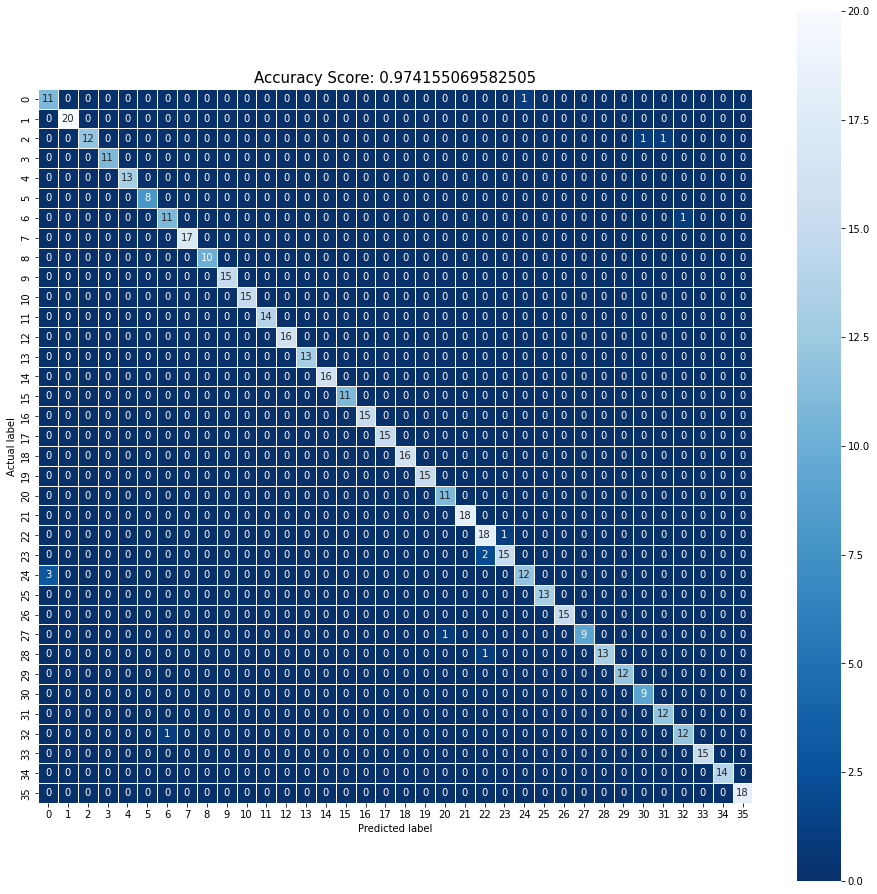

In [40]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(16,16))
sns.heatmap(cm,annot=True, fmt='.0f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=15)

**Predicting for Random Data**

In [41]:
temp=list(zip(img_data,targetClss))
np.random.shuffle(temp)
img_data,targetClss=zip(*temp)

for i in range(10):
  result=LogReg.predict([img_data[i]])
  print(f"Actucal Class : {getClasses[targetClss[i]]} Predicted Class: {getClasses[result[0]]}")
    

Actucal Class : d Predicted Class: d
Actucal Class : k Predicted Class: k
Actucal Class : n Predicted Class: n
Actucal Class : 4 Predicted Class: 4
Actucal Class : e Predicted Class: e
Actucal Class : g Predicted Class: g
Actucal Class : i Predicted Class: i
Actucal Class : n Predicted Class: n
Actucal Class : 7 Predicted Class: 7
Actucal Class : u Predicted Class: u


### **Model 3: Decision Tree With Max Depth of 12**

**Initializing the Model**

In [42]:
DecTree=DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=8, random_state=100)

**Trainig The Model**

In [43]:
DecTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=8,
                       random_state=100)

**Predicting for Test Cases**

In [44]:
ypred=DecTree.predict(x_test)

**Accuracy of the model and F1 accuracy for each Class**

In [45]:
print(f"Accuracy of the model : {accuracy_score(y_test,ypred)}")
print(f"F1 Score of the model:\n{f1_score(y_test,ypred,average=None)}")

Accuracy of the model : 0.7813121272365805
F1 Score of the model:
[0.46153846 0.86486486 0.64       0.71428571 0.76190476 0.58823529
 0.52173913 0.72727273 0.58823529 0.72       0.64705882 0.78787879
 0.88235294 0.88       0.88235294 0.85714286 0.93333333 1.
 0.82758621 0.96774194 0.85714286 1.         0.82051282 0.68965517
 0.46666667 0.92307692 0.92857143 0.69565217 0.66666667 0.76190476
 0.77777778 0.7826087  0.68965517 0.8        0.92857143 0.76190476]


**Confusion Matrix**

Text(0.5, 1.0, 'Accuracy Score: 0.7813121272365805')

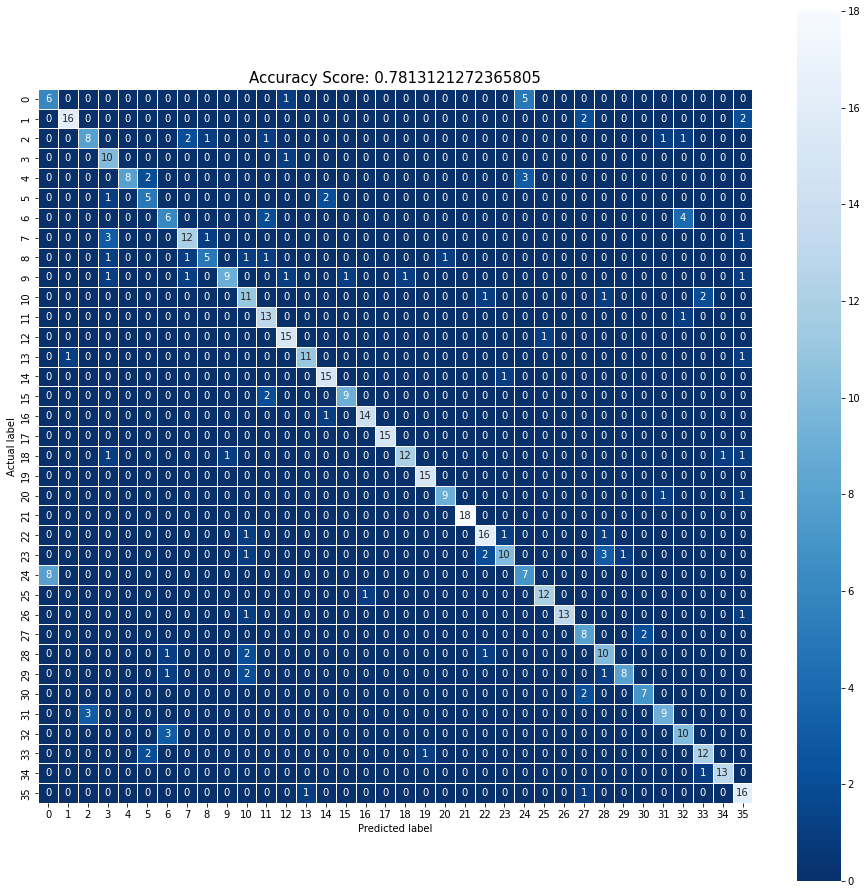

In [46]:
cm = confusion_matrix(y_test,ypred)
plt.figure(figsize=(16,16))
sns.heatmap(cm,annot=True, fmt='.0f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,ypred))
plt.title(all_sample_title,size=15)

**Predicting for Random Data**

In [47]:
temp=list(zip(img_data,targetClss))
np.random.shuffle(temp)
img_data,targetClss=zip(*temp)

for i in range(10):
  result=DecTree.predict([img_data[i]])
  print(f"Actucal Class : {getClasses[targetClss[i]]} Predicted Class: {getClasses[result[0]]}")
    

Actucal Class : c Predicted Class: c
Actucal Class : n Predicted Class: n
Actucal Class : z Predicted Class: 8
Actucal Class : p Predicted Class: p
Actucal Class : w Predicted Class: w
Actucal Class : i Predicted Class: i
Actucal Class : 8 Predicted Class: 8
Actucal Class : 0 Predicted Class: 0
Actucal Class : t Predicted Class: t
Actucal Class : n Predicted Class: n


# **Summary of the Models**

In [49]:
print(f"The Accuracy of KNN is {accuracy_score(y_test,predicted)}")
print(f"The Accuracy of Logistic Regression is {accuracy_score(y_test,y_pred)}")
print(f"The Accuracy of Decision Tree is {accuracy_score(y_test,ypred)}")

The Accuracy of KNN is 0.9165009940357853
The Accuracy of Logistic Regression is 0.974155069582505
The Accuracy of Decision Tree is 0.7813121272365805
